In [1]:
from breakthrough_A import *

Version:  0.3.15


In [2]:
skittles_agent=Agent(skittles_move)
skittles_agent.T=Table()  # starts off empty
skittles_agent.post=skittles_after
skittles_agent.learning=True

## Minimax

In [3]:
_S3=Storage()

_S3+=1,0.0054738521575927734
_S3+=2,0.0037260055541992188
_S3+=3,0.0021162033081054688
_S3+=4,0.0003552436828613281

_S4=Storage()
_S4+=1,0.7105312347412109
_S4+=2,0.24379777908325195
_S4+=3,0.1660621166229248
_S4+=4,0.11437702178955078
_S4+=5,0.07081866264343262

_S5=Storage()
_S5+=1,3*60+10.166576862335205
_S5+=2,1*60+33.36342978477478
_S5+=3,1*60+17.327609062194824
_S5+=4,41.760281801223755
_S5+=5,33.39378499984741


_S6=Storage()


x3,y3=_S3.arrays()
x4,y4=_S4.arrays()
x5,y5=_S5.arrays()



In [4]:
from pylab import *

(8.72721014462804, 'hours')

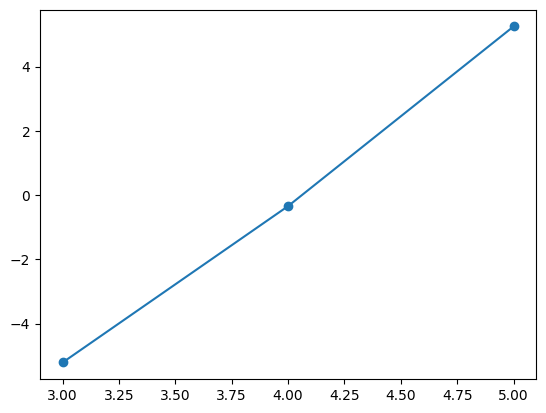

In [88]:
N=[3,4,5]
logy=[log(_) for _ in [0.0054738521575927734,0.7105312347412109,3*60+10.166576862335205]]

plot(N,logy,'-o')
p=polyfit(N,logy,1)

t=exp(polyval(p,6)) # predict for size 6 
t/60/60, "hours"

(74.85053551278003, 'hours')

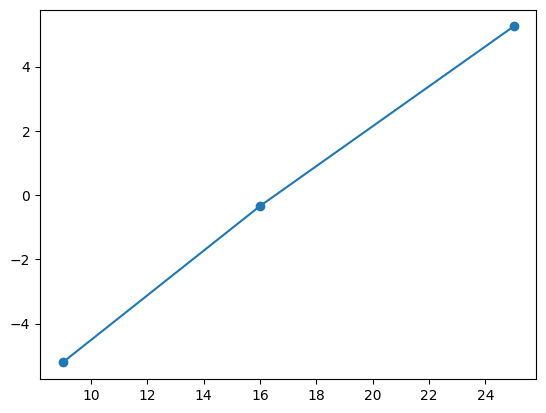

In [87]:
N=[3*3,4*4,5*5]
logy=[log(_) for _ in [0.0054738521575927734,0.7105312347412109,3*60+10.166576862335205]]

plot(N,logy,'-o')
p=polyfit(N,logy,1)

t=exp(polyval(p,6*6)) # predict for size 6 
t/60/60, "hours"

In [6]:
g=Game(N=3)
g.display=False
g.run(minimax_agent,minimax_agent)

[2]

# Stages of training

- training stage == learning, changing # of skittles
- testing stage == fixed # of skittles, see how well it does
- epoch -- number of training games before testing


In [60]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [61]:
agent1=Agent(skittles_move)
agent1.T=Table()  # starts off empty
agent1.post=skittles_after
agent1.learning=True

agent2=Agent(skittles_move)
agent2.T=Table()  # starts off empty
agent2.post=skittles_after
agent2.learning=True

- N=3  only 200 iterations
- 

In [62]:
epoch_number=200  # play 200 games, learning, and then test
N_test=100  # play 100 games, fixed skittles, see how well it does
N_train=500  # play 500 epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

100000

In [63]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [64]:
from matplotlib import pyplot as plt

# train then test agent 1 vs minimax

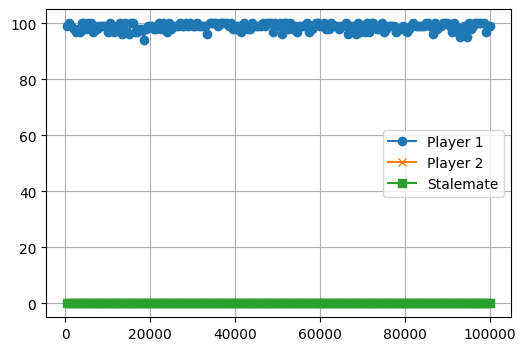

In [65]:
board_size=4

plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)
for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
    # training step
    agent1.learning=True
    agent2.learning=True

    g=Game(number_of_games=N_train,N=board_size)
    g.display=False
    result=g.run(agent1,agent2)

    # testing step
    agent1.learning=False
    agent2.learning=False

    g=Game(number_of_games=N_test,N=board_size)
    g.display=False
    result=g.run(minimax_agent,agent2)

    iteration_count+=N_train


    percentage_won_player1.append(result.count(1)/N_test*100)
    percentage_won_player2.append(result.count(2)/N_test*100)
    percentage_stalemate.append(result.count(0)/N_test*100)
    number_of_iterations.append(iteration_count)

    clear_output(wait=True)
    ax.cla()
    ax.grid(True)
    
    ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
    ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
    ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
    ax.legend()

    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.show()
    display(fig)

# train then test agent1 vs agent 2

In [3]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [4]:
agent1=Agent(skittles_move)
agent1.T=Table()  # starts off empty
agent1.post=skittles_after
agent1.learning=True

agent2=Agent(skittles_move)
agent2.T=Table()  # starts off empty
agent2.post=skittles_after
agent2.learning=True

- N=3  only 200 iterations
- 

In [5]:
epoch_number=200  # play 200 games, learning, and then test
N_test=100  # play 100 games, fixed skittles, see how well it does
N_train=500  # play 500 epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

100000

In [6]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [7]:
from matplotlib import pyplot as plt

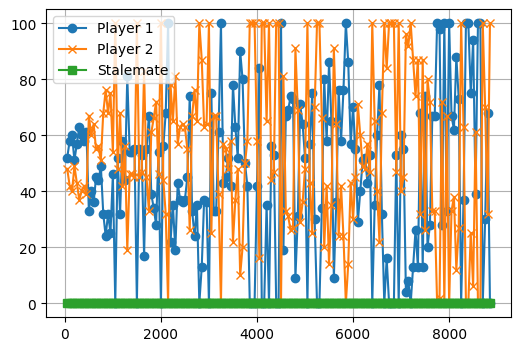

In [16]:
board_size=4

plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)
try:
    for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
        # training step
        agent1.learning=True
        agent2.learning=True
    
        g=Game(number_of_games=N_train,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        # testing step
        agent1.learning=False
        agent2.learning=False
    
        g=Game(number_of_games=N_test,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        iteration_count+=N_train
    
    
        percentage_won_player1.append(result.count(1)/N_test*100)
        percentage_won_player2.append(result.count(2)/N_test*100)
        percentage_stalemate.append(result.count(0)/N_test*100)
        number_of_iterations.append(iteration_count)
    
        assert result.count(3)==0   # error on illegal games
    
        clear_output(wait=True)
        ax.cla()
        ax.grid(True)
        
        ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
        ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
        ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
        ax.legend()
    
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.show()
        display(fig)

except KeyboardInterrupt:
    pass

# Q learning

In [9]:
agent1=Agent(Q_move)
agent1.post=Q_after
agent1.Q=Table()
agent1.learning=True

agent1.α=0.3  # learning rate
agent1.γ=0.9  # discount factor
agent1.ϵ=0.1  # random games sometimes for exploration

agent2=Agent(Q_move)
agent2.post=Q_after
agent2.Q=Table()
agent2.learning=True

agent2.α=0.3  # learning rate
agent2.γ=0.9  # discount factor
agent2.ϵ=0.1  # random games sometimes for exploration


In [10]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [11]:
epoch_number=200  # play 200 games, learning, and then test
N_test=100  # play 100 games, fixed skittles, see how well it does
N_train=50  # play 500 epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

10000

In [12]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [13]:
from matplotlib import pyplot as plt

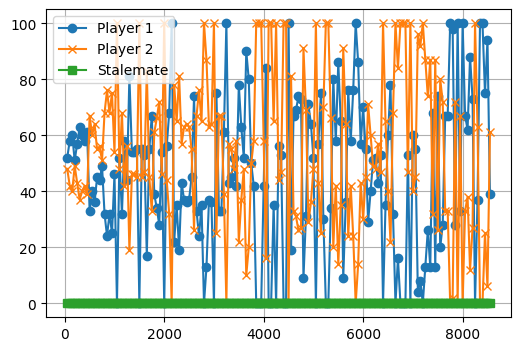

In [15]:
board_size=4

plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)
try:
    for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
        # training step
        agent1.learning=True
        agent2.learning=True
    
        g=Game(number_of_games=N_train,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        # testing step
        agent1.learning=False
        agent2.learning=False
    
        g=Game(number_of_games=N_test,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        iteration_count+=N_train
    
    
        percentage_won_player1.append(result.count(1)/N_test*100)
        percentage_won_player2.append(result.count(2)/N_test*100)
        percentage_stalemate.append(result.count(0)/N_test*100)
        number_of_iterations.append(iteration_count)
    
        assert result.count(3)==0   # error on illegal games
    
        clear_output(wait=True)
        ax.cla()
        ax.grid(True)
        
        ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
        ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
        ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
        ax.legend()
    
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.show()
        display(fig)

except KeyboardInterrupt:
    pass